In [2]:
import numpy as np
import matplotlib.pyplot as plt

## PUNTO 1

In [3]:
def Transformada_Fourier(x,y,f):
    F=np.zeros_like(y,dtype=complex)
    #dt=1/(x[1]-x[0])
   # assert np.sqrt(2)<dt/2, "Frecuencia de la señal mayor al limite de Nysquic"
    for i in range(len(x)):
        F[i]=y[i]*np.exp(-2*np.pi*1j*x[i]*f)
    return np.sum(F)

## PUNTO 2 a

In [4]:
t_max=100
N=400
t=np.linspace(0,t_max,N)
f=lambda t:np.sin(2*np.pi*t*np.sqrt(2))
f_2=lambda t:np.sin(t) ###Prueba
y=f(t)
y_2=f(t) ###Prueba

In [5]:
Transformada_Fourier(t,y_2,0.1) ##Prueba

(0.7033663091899005-0.023275396684723004j)

## PUNTO 2 c

In [6]:
!pip install numba

In [7]:
f_0=1/(t[1]-t[0])
frecuencias=np.arange(0,f_0,0.01)
from numba import njit
#@njit
def Transformada_Fourier(x,y,f):
    F=np.zeros_like(y)+0j
    #dt=1/(x[1]-x[0])
   # assert np.sqrt(2)<dt/2, "Frecuencia de la señal mayor al limite de Nysquic"
    for i in range(len(x)):
        F[i]=y[i]*np.exp(-2*np.pi*1j*x[i]*f)
    return np.sum(F)
#@njit
def norma_transformada(frecuencias,t,y):
    F=np.zeros_like(frecuencias)
    for i,f in enumerate(frecuencias):
        F[i]=abs(Transformada_Fourier(t,y,f))
    return F
F=norma_transformada(frecuencias,t,y)

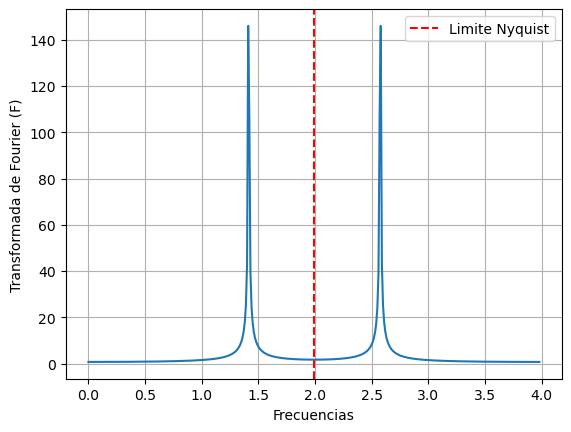

In [8]:
plt.plot(frecuencias,F)
plt.xlabel("Frecuencias")
plt.ylabel("Transformada de Fourier (F)")
plt.axvline(f_0/2,linestyle="--",color="r",label="Limite Nyquist")
plt.legend()
plt.grid()

## PUNTO 2 D

In [9]:
##Ruido
ruido=np.random.normal(0.0,0.1,N)
y_new=ruido+y

In [10]:
F_new=norma_transformada(frecuencias,t,y_new)

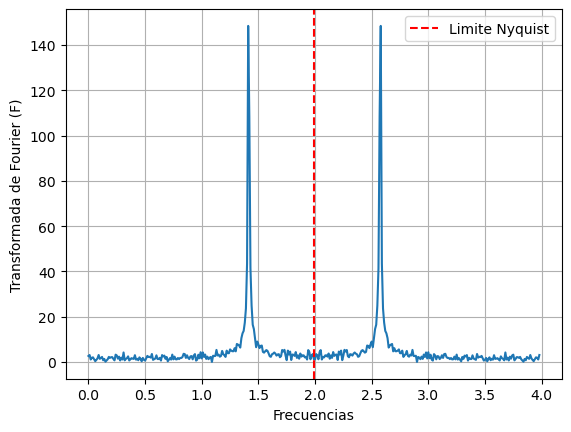

In [11]:
plt.plot(frecuencias,F_new)
plt.xlabel("Frecuencias")
plt.ylabel("Transformada de Fourier (F)")
plt.axvline(f_0/2,linestyle="--",color="r",label="Limite Nyquist")
plt.legend()
plt.grid()

Se evidencia una leve amplificación a las frecuencias bajas y ciertas variaciones en la grafica de Fourier respecto a frecuencia

In [12]:
def pico_FWHM(F,frecuencias):
    F2=F[:int(len(F)/2)]
    frecuencias_2=frecuencias[:int(len(F)/2)]
    indice_altura_max=np.where(F2==np.max(F2))
    altura_max=np.max(F2)
    altura_media=F2[indice_altura_max]/2.0
    resta=np.abs(F2-altura_media)
    valor_min=np.min(resta)
    resta_2=resta[resta>valor_min]
    valor_min_2=np.min(resta_2)
    i1=np.where(resta==valor_min)
    i2=np.where(resta==valor_min_2)
    distancia=np.abs(frecuencias[i1]-frecuencias[i2])
    return distancia[0], altura_max,indice_altura_max[0][0]

## PUNTO 3A

In [13]:
ancho,altura_maxima,posicion=pico_FWHM(F_new,frecuencias)
ancho,altura_maxima,posicion ##CORREGIR LAS TABLAS Y TEXTO

(0.029999999999999805, 148.44884580234026, 141)


| N   | Ancho   | x   |
|-----|---------|-----|
| 100 | 0.006   | 285 |
| 200 | 0.059   | 284 |
| 500 | 0.059   | 283 |
| 700 | 0.059   | 283 |
| 800 | 0.059   | 283 |

### Resultados $3 B$ (sin cambiar \(N = 400\))

| \(t_{\max}\) | Ancho   | x    |
|--------------|---------|------|
| 5            | 0.24    | 71   |
| 10           | 0.119   | 142  |
| 20           | 0.059   | 283  |
| 50           | 0.023   | 709  |
| 100          | 0.011   | 1417 |

## PUNTO 4

In [14]:
N=80
ts_0=np.linspace(0,10,N)
ts=ts_0+np.random.normal(0.,0.01,N)
f=15
ys=np.sin(2*np.pi*ts*f)
dt=1/(ts[1]-ts[0])
nyquist=dt
nyquist

7.300685295065548

In [15]:
Transformada_Fourier(ts,ys,nyquist)

(-0.32358255105192213+3.9306156565207466j)

In [16]:
frecuencias=np.linspace(0,4*dt,10*N)
Fs=norma_transformada(frecuencias,ts,ys)

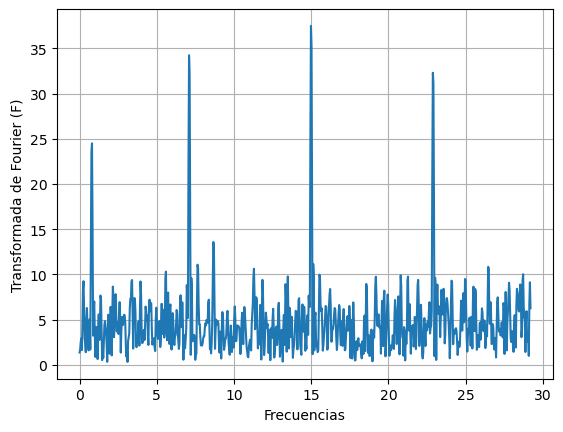

In [17]:
plt.plot(frecuencias,Fs)
plt.xlabel("Frecuencias")
plt.ylabel("Transformada de Fourier (F)")
plt.grid()

Es posible recuperar la señal original, ya que el ruido en la función atenúa las frecuencias falsas, dejando la frecuencia verdadera como la más prominente. En la gráfica anterior se puede observar el efecto del aliasing; sin embargo, la frecuencia principal, que en este caso es de 15 Hz, se destaca como el pico más predominante en comparación con las demás frecuencias. De este modo, aunque la frecuencia principal supere la frecuencia de Nyquist, si se realiza un análisis cuidadoso y se grafica repetidamente, es posible identificar la frecuencia verdadera.

## PUNTO 5

In [19]:
import pandas as pd

In [20]:
data="https://www.astrouw.edu.pl/ogle/ogle4/OCVS/lmc/cep/phot/I/OGLE-LMC-CEP-0001.dat"
datos=pd.read_csv(data,delim_whitespace=True,header=None)
datos.columns=["t","y","$\sigma_y$"]
t_data=datos["t"]
y_data=datos["y"]
y_data-=np.mean(y_data)
frecuencias_data=np.arange(3,5,0.0001) 

In [21]:
F_data=norma_transformada(frecuencias_data,t_data,y_data)
i_max=np.where(F_data==np.max(F_data))
frecuencia_señal=frecuencias_data[i_max][0]
frecuencia_señal

3.259200000000547

$\textit{La frecuencia principal de la señal es: 3.26 Hz}$

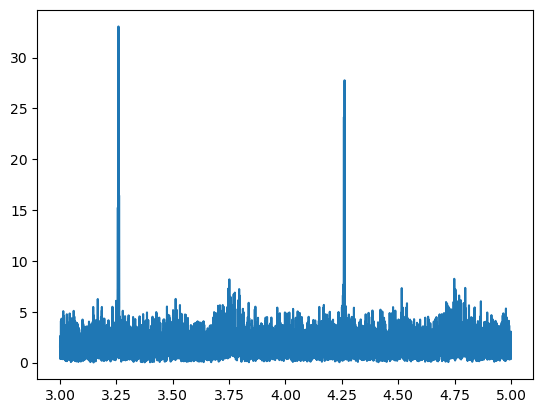

In [22]:
plt.plot(frecuencias_data,F_data)

In [23]:
phi=np.mod(t_data*frecuencia_señal,1)

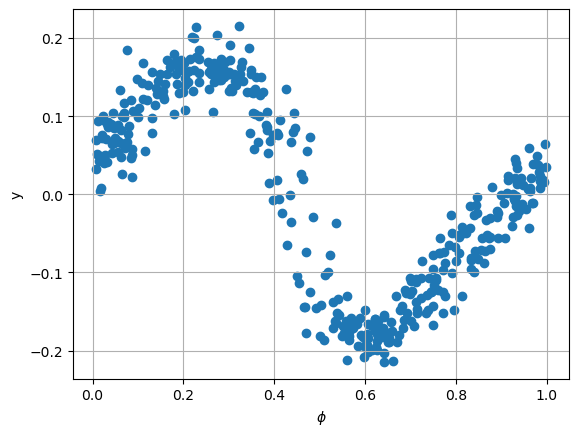

In [24]:
plt.scatter(phi,y_data)
plt.xlabel("$\phi$")
plt.ylabel("y")
plt.grid()

La gráfica de fase anterior revela la verdadera forma del comportamiento de los datos. En la función $\varphi$, al multiplicar cada punto de tiempo por la frecuencia principal, se calcula el avance temporal en términos de ciclos completos. Luego, con la operación $mod(f_{p} \cdot t, 1)$, se obtiene la fracción de un período completo, es decir, el valor dentro de un ciclo que varía entre 0 y 1. Esto permite visualizar el comportamiento real de los datos dentro de un ciclo periódico.